## Fitting a hyperplane on a point cloud
This notebook generates points around a regular polygon with added gaussian noise, and attempts to fit a hyperplane about one of the sides. The hyperplane to be fit consists of the set of points x which satisfy $$x^Tw+1 = 0$$
Stochastic Gradient Descent is used to find the w that minimizes
$$ Cost(w) -\frac{1}{\left\Vert\left(Aw+b  \rm\right) \right\Vert^2+1}$$
Where the rows of A are points in the point cloud, and b is a vector of 1's. This cost funciton is inspired by electrostatic attraction between charged particles. In a sense, this algorithm runs a simulation where each datapoint is given a finite charge, and a massless rod with the opposite charge is dropped on top, then the best fit is determined by where the rod snaps into place. With this model, points near our rod will weigh more heavily on the rod's final resting point than the others. This is not a convex cost function, so many local minima exist, as expected. With random initialization of w, more local optima can be discovered.

This method can be generalized for arbitrary dimensions, though doing so would require new methods to generate a point cloud.

In [589]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
def generatePolygon(n):
    assert n >= 3
    a = 2*np.pi / n
    rot = np.array([[np.cos(a),-np.sin(a)],
                     [np.sin(a), np.cos(a)]])
    start = np.array([1,0])
    corners = np.asarray([np.linalg.matrix_power(rot,i).dot(start) for i in range(n)])
    return corners

def generateNoisyPolygonCloud(n, num_points, sigma):
    corners = generatePolygon(n)
    points = []
    for i in range(num_points):
        edge_num = np.random.randint(n)
        edge = [corners[edge_num], corners[(edge_num+1)%n]]
        alpha = np.random.rand()
        points.append(alpha * edge[0] + (1-alpha) * edge[1] + sigma * np.random.randn(2))
    return np.asarray(points)



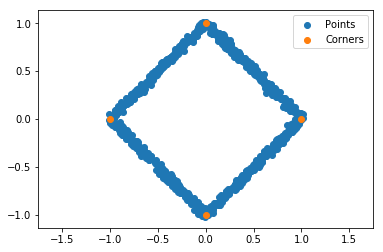

In [1237]:
'''Generate Polygon'''
num_corners = 4
num_points = 1000
noise_sigma = .02
Points = generateNoisyPolygonCloud(num_corners, num_points, noise_sigma)
Corners = generatePolygon(num_corners) #display purposes

'''Display Polygon'''
plt.scatter(*Points.T, label='Points')
plt.scatter(*Corners.T, label='Corners')
plt.axis('equal')
plt.legend()
plt.show()

## Solving for best fit

gradient: [-1.08024700e-13 -1.04749542e-13]
loss: -0.023943240206812787
w: [ 0.95708425 -0.97740862]
null: [-0.71449643 -0.69963909]
center: [-0.51144385  0.52230473]


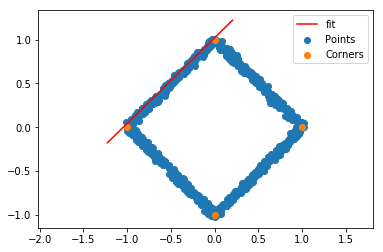

In [1245]:
'''Tuning Parameters'''
a
num_sgd_iterations = 5000
learning_rate = 0.0005

'''reset w'''
w = np.random.randn(2)

'''Inverse Square SGD'''
A = Points
b = np.ones(A.shape[0])
for _ in range(num_sgd_iterations):
    Aw_b = A.dot(w) + b
    gradient = 2*((Aw_b**2+1)**-2*(Aw_b)).dot(A)
    w -= 0.learning_rate * gradient
    
print("gradient:", gradient)
print("loss:",-1/(np.linalg.norm(A.dot(w)+b)+1))

'''display fit'''
null_w = np.array([w[1], -w[0]])/np.linalg.norm(w)
center_w = -w/(w.dot(w))
line = np.outer(null_w, np.linspace(-1,1,2)) + np.outer(center_w, np.ones(2))
print("w:",w)
print("null:", null_w)
print("center:",center_w)
plt.scatter(*Points.T, label='Points')
plt.scatter(*Corners.T, label='Corners')
plt.plot(*line, label='fit', color = 'r')
plt.axis('equal')
plt.legend()
plt.show()